In [32]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import os 
import numpy as np

In [3]:
PATH  = './data'
df = pd.DataFrame()

def get_dpt_data(departement,PATH): 
    df = pd.read_csv(os.path.join(PATH,f'mutations_d{departement}_train_localized.csv'))
    df.drop(['Unnamed: 0','Unnamed: 0.1'],axis=1,inplace=True)
    return df

for dpt in ['75','77','78','91','92','93','94','95']: 
    df = pd.concat([df,get_dpt_data(dpt,PATH)],ignore_index=True)

# df = df[['coddep','libnatmut','libtypbien','anneemut','moismut','sbati','latitude','longitude','nbapt1pp', 'nbapt2pp', 'nbapt3pp', 'nbapt4pp', 'nbapt5pp', 'nbmai1pp', 'nbmai2pp', 'nbmai3pp', 'nbmai4pp', 'nbmai5pp','valeurfonc']]
#df.dropna(axis=0,inplace=True)
df = df[df['libtypbien'].isin(['UN APPARTEMENT','UNE MAISON'])]
df['coddep']=df.coddep.astype('str')
df.head()

KeyboardInterrupt: 

# IMPORT : 

In [44]:
from dataAugment import DataAugmentation, DataLoader
csv_files = ['./data/mutations_d75_train_localized.csv',
             './data/mutations_d77_train_localized.csv',
             './data/mutations_d78_train_localized.csv',
             './data/mutations_d91_train_localized.csv',
             './data/mutations_d92_train_localized.csv',
             './data/mutations_d93_train_localized.csv',
             './data/mutations_d94_train_localized.csv',
             './data/mutations_d95_train_localized.csv',
             ]

dl = DataLoader(csv_files) #list of csv names of og dataset
df = dl.combine_clean_files()
dataAug = DataAugmentation(df,file_path='./data/')
augment_df = dataAug.add_all()
augment_df.to_csv('augmented_data.csv')

Getting dfs...
Combining dfs...
Cleaning dfs...
Exploding columns...
Adding subdivisions...
Counting nearby train stops...


100%|██████████| 150/150 [00:36<00:00,  4.13it/s]


Adding communal crime rates...
Counting passoir thermiques...


/Users/youssefjouini/opt/anaconda3/lib/python3.9/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


# PREPROCESS : 

In [47]:
def func(row, L, replacement):
    if row['nomcom'] in L:
        return row['nomcom']
    else:
        return replacement


arrond_par = ['Paris 2e  Arrondissement', 'Paris 11e  Arrondissement',
       'Paris 4e  Arrondissement', 'Paris 8e  Arrondissement',
       'Paris 20e  Arrondissement', 'Paris 10e  Arrondissement',
       'Paris 17e  Arrondissement', 'Paris 1er Arrondissement',
       'Paris 15e  Arrondissement', 'Paris 12e  Arrondissement',
       'Paris 13e  Arrondissement', 'Paris 19e  Arrondissement',
       'Paris 18e  Arrondissement', 'Paris 6e  Arrondissement',
       'Paris 16e  Arrondissement', 'Paris 9e  Arrondissement',
       'Paris 14e  Arrondissement', 'Paris 3e  Arrondissement',
       'Paris 7e  Arrondissement', 'Paris 5e  Arrondissement']



df = augment_df
df = augment_df[['violence per 1000','burglaries per 1000', 'car theft per 1000','pourcentage_passoires','nomcom','public_transport_spots','coddep','libnatmut','libtypbien','anneemut','moismut','sbati','latitude','longitude','nbapt1pp', 'nbapt2pp', 'nbapt3pp', 'nbapt4pp', 'nbapt5pp', 'nbmai1pp', 'nbmai2pp', 'nbmai3pp', 'nbmai4pp', 'nbmai5pp','valeurfonc']]
df = df[df['libtypbien'].isin(['UN APPARTEMENT','UNE MAISON'])]
df = df[(df['valeurfonc']>1e4) & (df['valeurfonc']<=5*1e6)]
df['coddep']=df.coddep.astype('str')
# df['nomcom'] = df.apply(func, args=(arrond_par, 'banlieue'), axis=1)
df.dropna(axis=0,inplace=True)
df.head()

,violence per 1000,burglaries per 1000,car theft per 1000,pourcentage_passoires,nomcom,public_transport_spots,coddep,libnatmut,libtypbien,anneemut,...,nbapt2pp,nbapt3pp,nbapt4pp,nbapt5pp,nbmai1pp,nbmai2pp,nbmai3pp,nbmai4pp,nbmai5pp,valeurfonc
1,"9,42","5,56","2,8",21.696517,Lesches,0,77.0,Vente,UNE MAISON,2015.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,299000.0
1,"9,42","5,56","2,8",21.696517,Lesches,0,77.0,Vente,UNE MAISON,2019.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,310000.0
1,"9,42","5,56","2,8",21.696517,Lesches,0,77.0,Vente,UNE MAISON,2015.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,274000.0
1,"9,42","5,56","2,8",21.696517,Lesches,0,77.0,Vente,UNE MAISON,2018.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,296000.0
1,"9,42","5,56","2,8",21.696517,Lesches,0,77.0,Vente,UNE MAISON,2019.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,373480.0


<AxesSubplot:xlabel='coddep'>

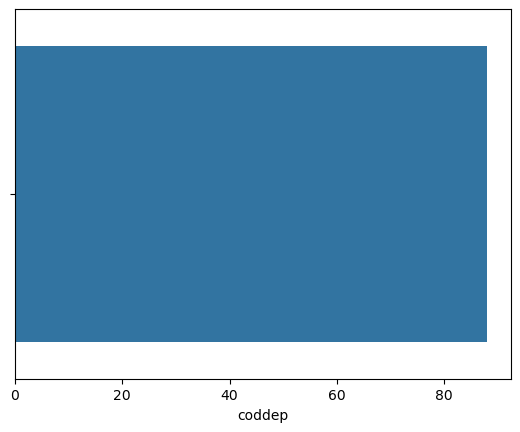

In [49]:
sns.barplot(data=augment_df,x='coddep')

# EDA : 

### GENERAL

In [216]:
print(df.columns)
print(df.info())

Index(['coddep', 'libnatmut', 'libtypbien', 'anneemut', 'moismut', 'sbati',
       'latitude', 'longitude', 'nbapt1pp', 'nbapt2pp', 'nbapt3pp', 'nbapt4pp',
       'nbapt5pp', 'nbmai1pp', 'nbmai2pp', 'nbmai3pp', 'nbmai4pp', 'nbmai5pp',
       'valeurfonc'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
Int64Index: 931296 entries, 0 to 1271567
Data columns (total 19 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   coddep      931296 non-null  object 
 1   libnatmut   931296 non-null  object 
 2   libtypbien  931296 non-null  object 
 3   anneemut    931296 non-null  float64
 4   moismut     931296 non-null  float64
 5   sbati       931296 non-null  float64
 6   latitude    931296 non-null  float64
 7   longitude   931296 non-null  float64
 8   nbapt1pp    931296 non-null  float64
 9   nbapt2pp    931296 non-null  float64
 10  nbapt3pp    931296 non-null  float64
 11  nbapt4pp    931296 non-null  float64
 12  nbapt5pp    9312

In [217]:
print(df.describe(include='object'))

        coddep libnatmut      libtypbien
count   931296    931296          931296
unique       8         6               2
top       75.0     Vente  UN APPARTEMENT
freq    172941    905595          624339


In [218]:
print(df.describe(include='float64'))

            anneemut        moismut          sbati       latitude  \
count  931296.000000  931296.000000  931296.000000  931296.000000   
mean     2017.138274       6.685355      70.767114      48.832718   
std         1.932915       3.351785      39.709672       0.137764   
min      2014.000000       1.000000       9.000000      48.125361   
25%      2016.000000       4.000000      43.000000      48.789754   
50%      2017.000000       7.000000      65.000000      48.853850   
75%      2019.000000       9.000000      89.000000      48.904755   
max      2020.000000      12.000000    1286.000000      49.236155   

           longitude       nbapt1pp       nbapt2pp       nbapt3pp  \
count  931296.000000  931296.000000  931296.000000  931296.000000   
mean        2.355135       0.120380       0.202107       0.204364   
std         0.233994       0.325405       0.401571       0.403236   
min         1.453993       0.000000       0.000000       0.000000   
25%         2.245640       0.0000

### TARGET : 

SKEWNESS : 418.25076386742137
(-10000000000.001, 0.0]           0.014837
(0.0, 1.0]                        0.058388
(1.0, 100.0]                      0.023163
(100.0, 1000.0]                   0.097669
(1000.0, 10000.0]                 0.372848
(10000.0, 100000.0]               5.811332
(100000.0, 1000000.0]            91.094656
(1000000.0, 5000000.0]            2.502023
(5000000.0, 10000000.0]           0.019427
(10000000.0, 100000000.0]         0.005230
(100000000.0, 1000000000.0]       0.000427
(1000000000.0, 10000000000.0]     0.000000
Name: valeurfonc, dtype: float64


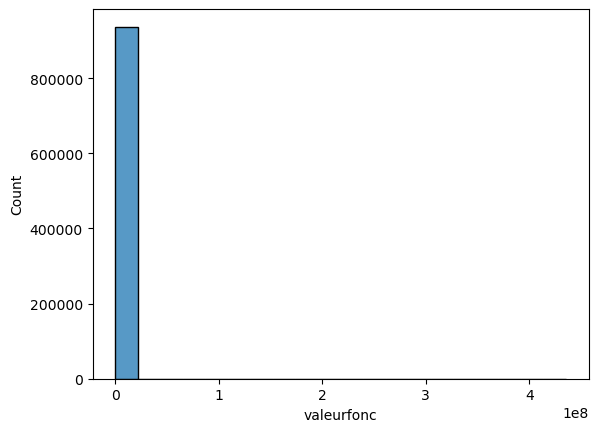

In [222]:
print('SKEWNESS :',df['valeurfonc'].skew())
print(df['valeurfonc'].value_counts(bins=[-1e10,0,1,1e2,1e3,1e4,1e5,1e6,5*1e6,1e7,1e8,1e9,1e10],normalize=True,sort=False)*100)
sns.histplot(x=df['valeurfonc'],bins=20)
plt.show()

### FEATURE ENGINEERING TARGET : 

SKEWNESS : 4.225746740086817
(9999.999, 50000.0]        0.773760
(50000.0, 100000.0]        5.072179
(100000.0, 300000.0]      57.073476
(300000.0, 500000.0]      23.566621
(500000.0, 1000000.0]     10.997041
(1000000.0, 5000000.0]     2.516923
Name: valeurfonc, dtype: float64


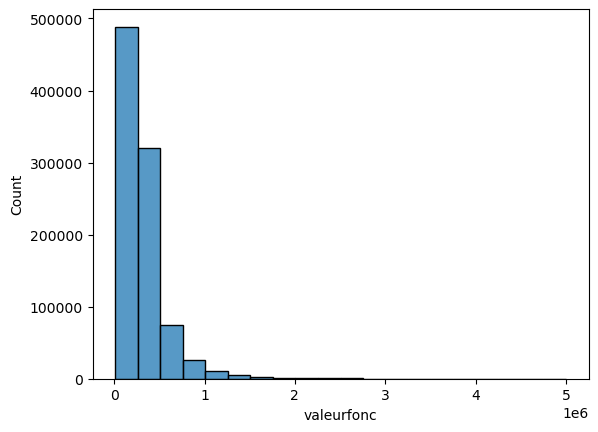

In [4]:
df = df[(df['valeurfonc']>1e4) & (df['valeurfonc']<=5*1e6)]
print('SKEWNESS :',df['valeurfonc'].skew())
print(df['valeurfonc'].value_counts(bins=[1e4,5*1e4,1e5,3*1e5,5*1e5,1e6,5*1e6],normalize=True,sort=False)*100)
sns.histplot(x=df['valeurfonc'],bins=20)
plt.show()


### UNIVARIATE EXPLORATION : 

<AxesSubplot:title={'center':'# of different types of goods and mutations '}, xlabel='libtypbien', ylabel='count'>

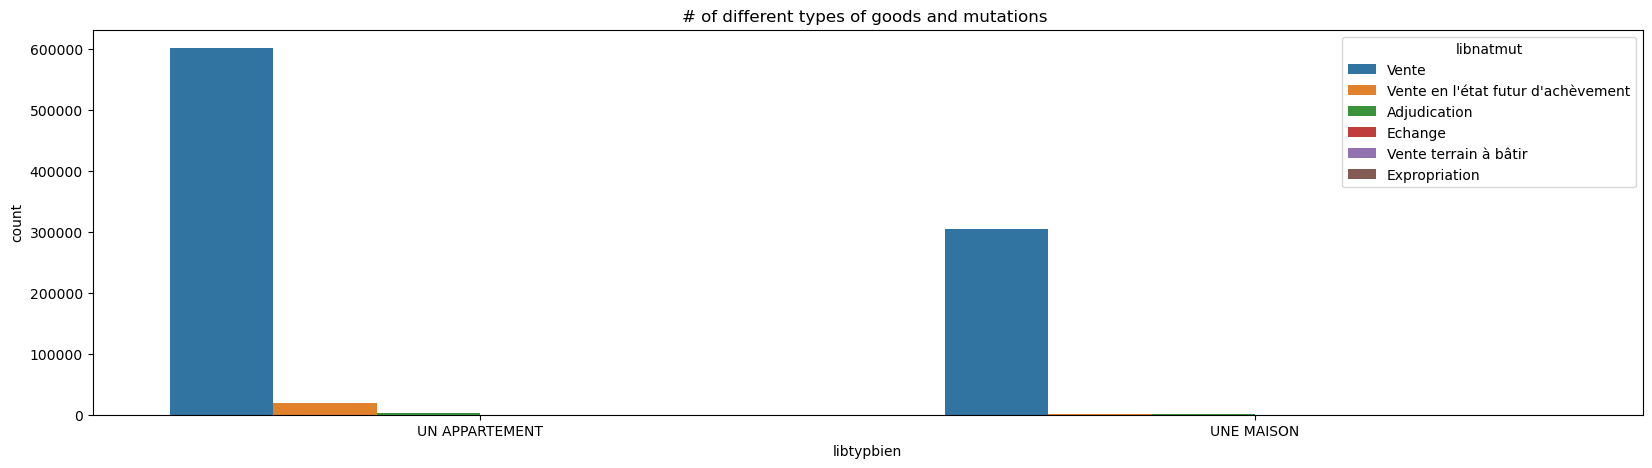

In [230]:
plt.figure(figsize=(20,5))
plt.title("# of different types of goods and mutations ")
sns.countplot(data=df,x='libtypbien',hue='libnatmut')

<AxesSubplot:title={'center':'# of mutations per month and year'}, xlabel='moismut', ylabel='count'>

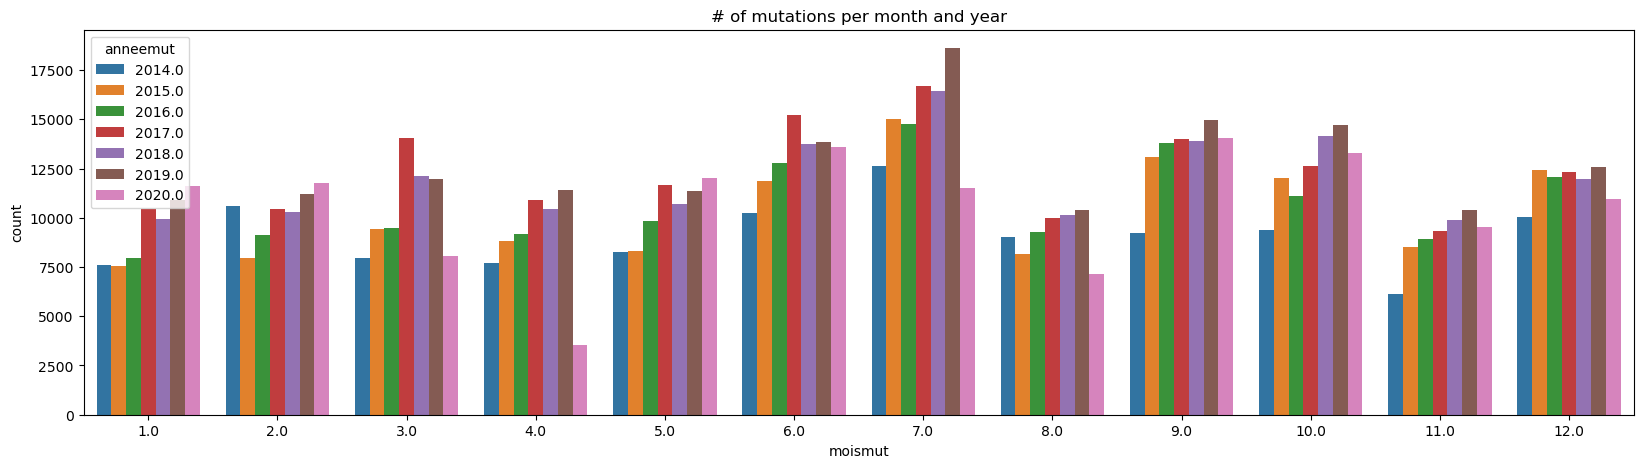

In [231]:
plt.figure(figsize=(20,5))
plt.title("# of mutations per month and year")
sns.countplot(data=df,x='moismut',hue='anneemut')

<AxesSubplot:xlabel='coddep', ylabel='count'>

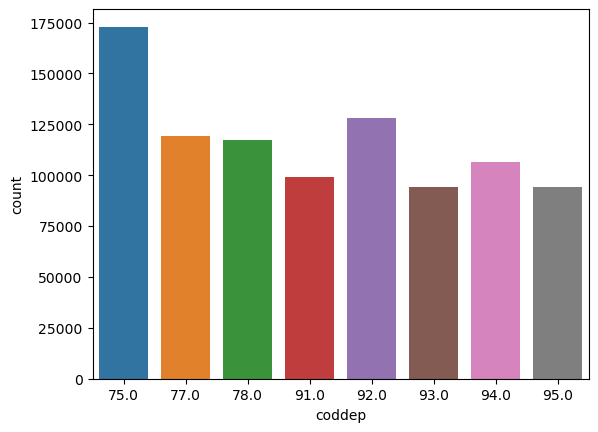

In [232]:
sns.countplot(data=df,x='coddep')

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

/Users/youssefjouini/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


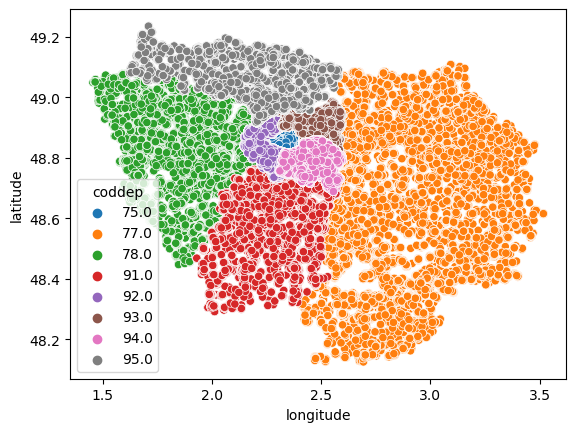

In [189]:
sns.scatterplot(data=df,x='longitude',y='latitude',hue='coddep')

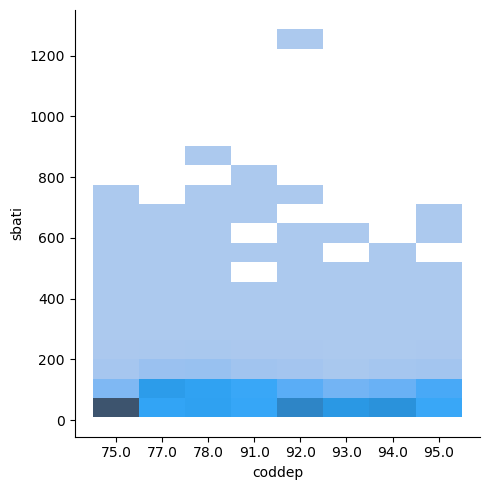

In [238]:
sns.displot(data=df,x='coddep',bins=20,y='sbati')
plt.show()

### BIVARIATE ANALYSIS : 

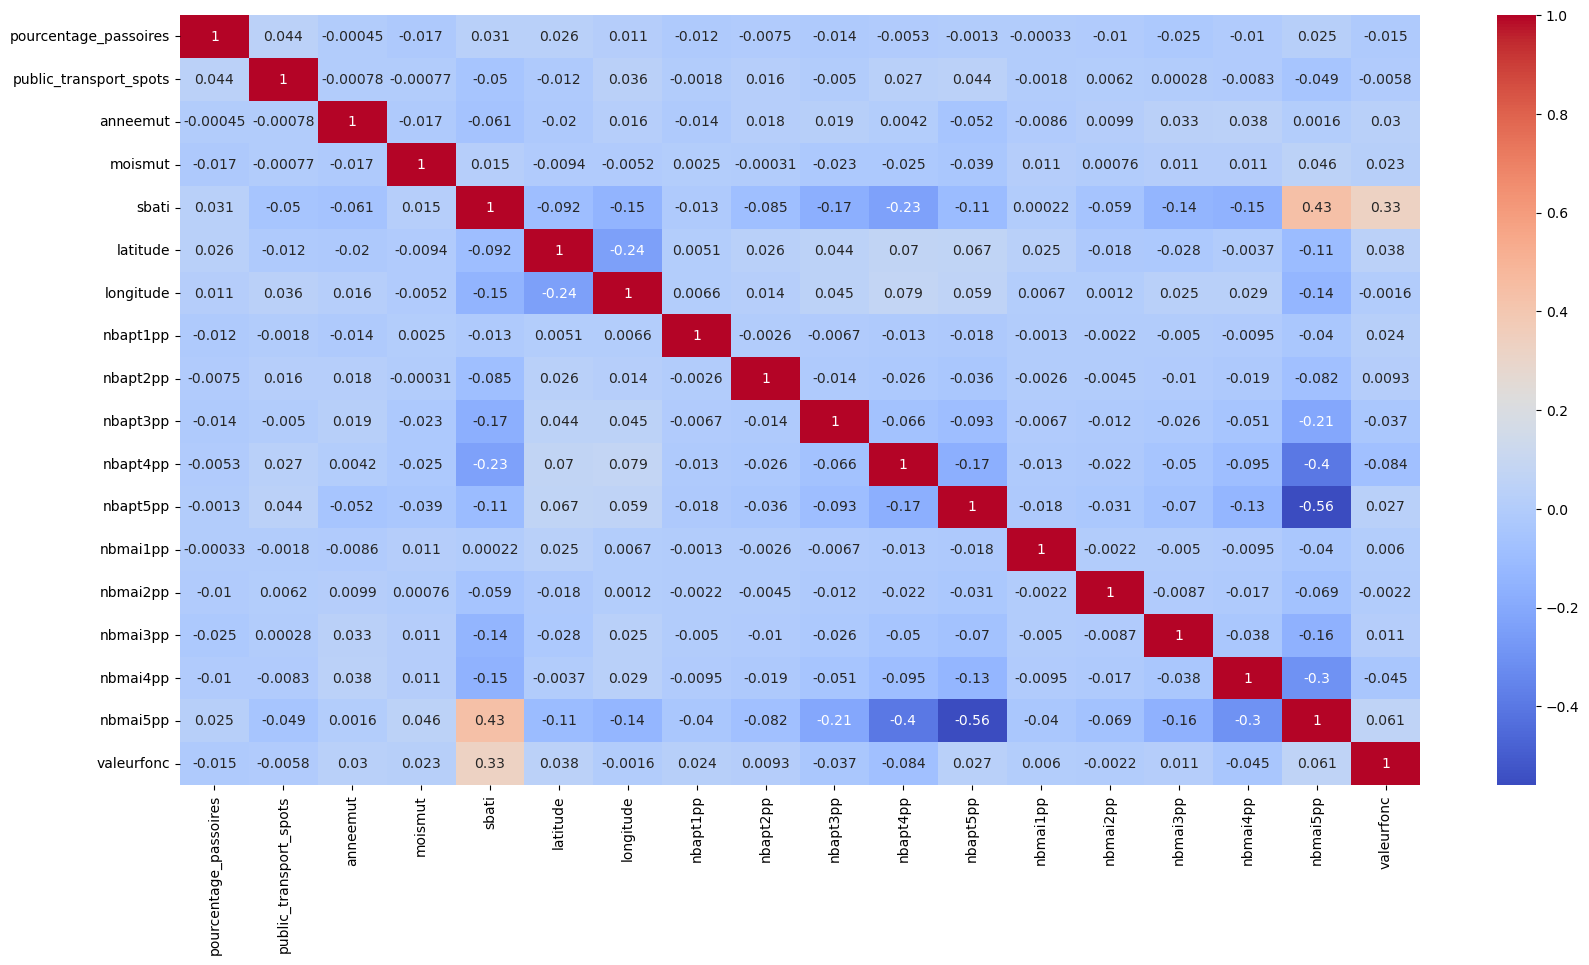

In [34]:
# EDA : 
corr = df[df.valeurfonc>1e6].corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr,annot=True,cmap='coolwarm')
plt.show()

### VIOLINPLOTS : 

#### LOW RANGE : 

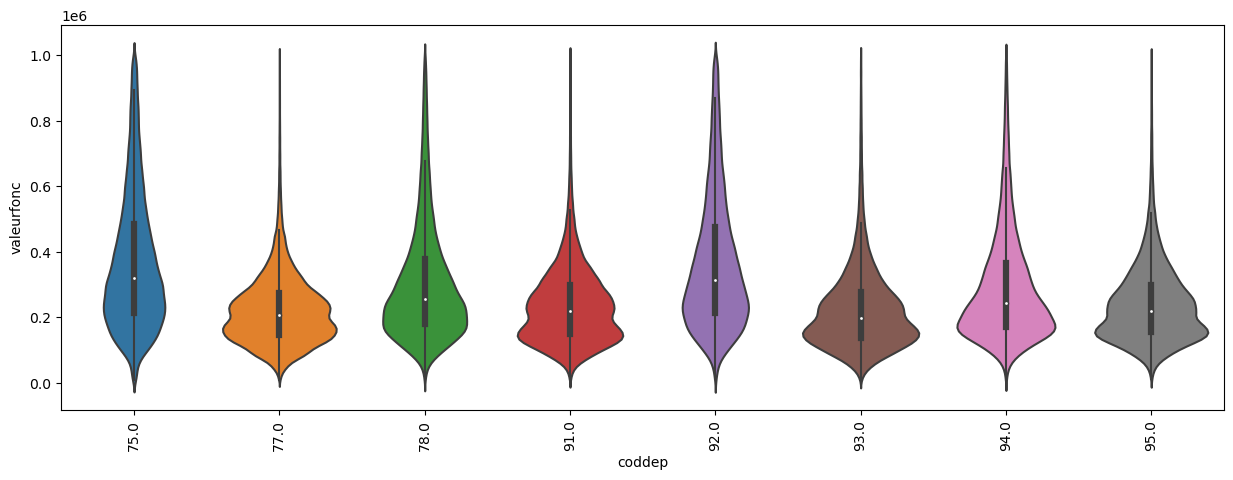

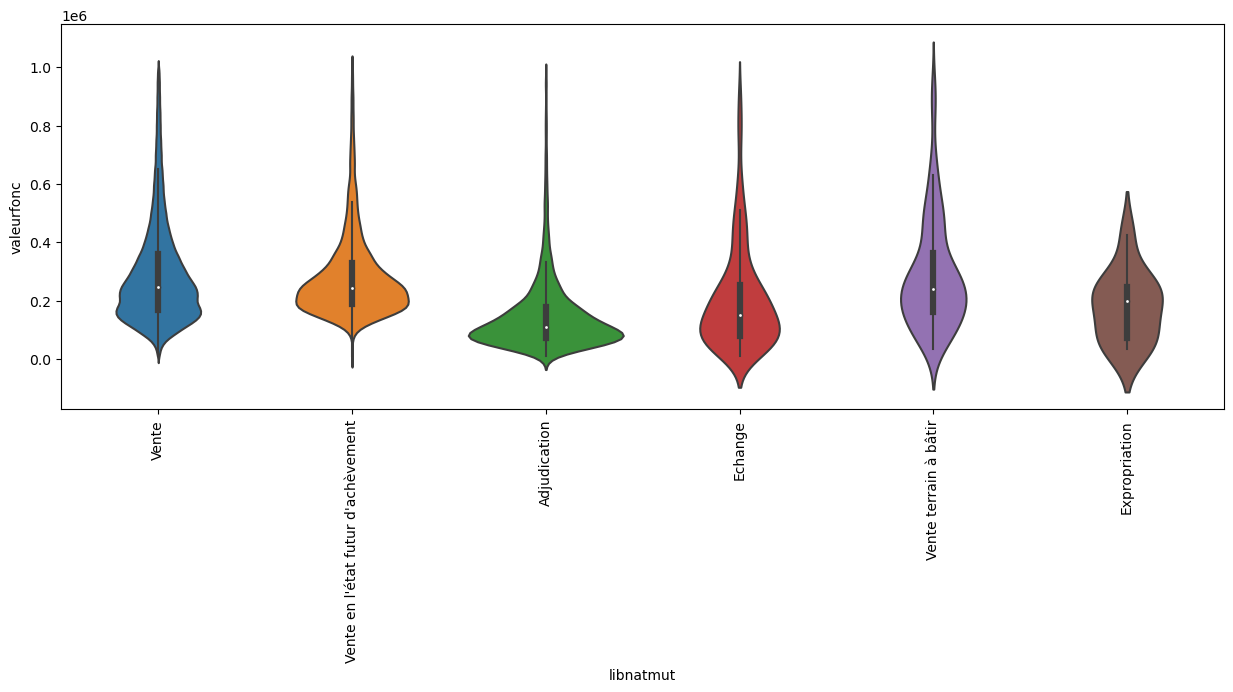

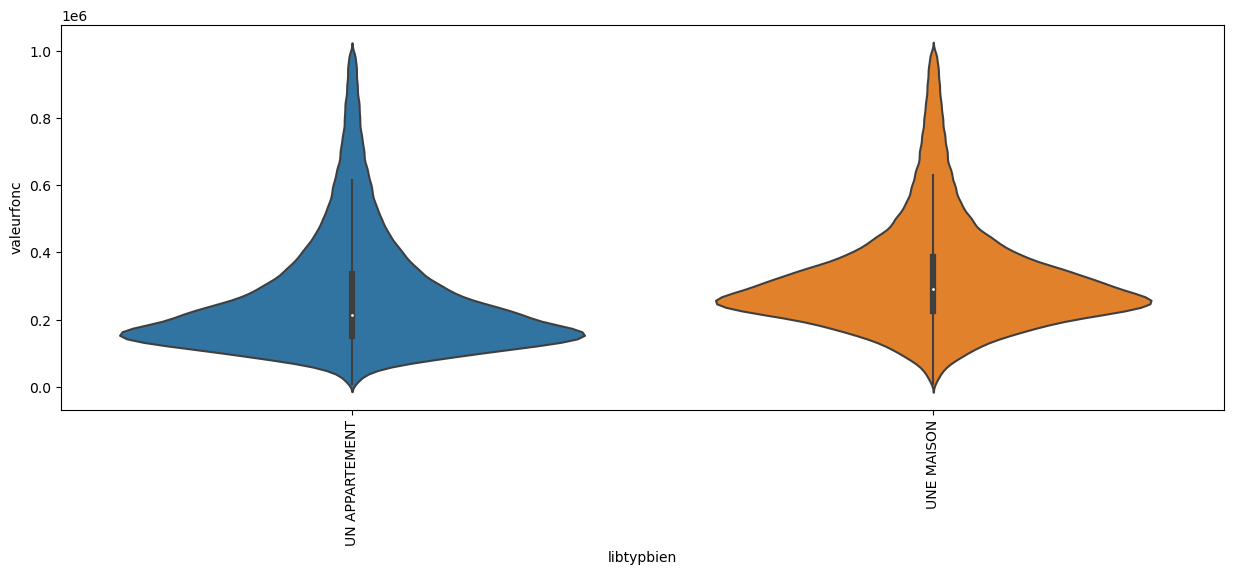

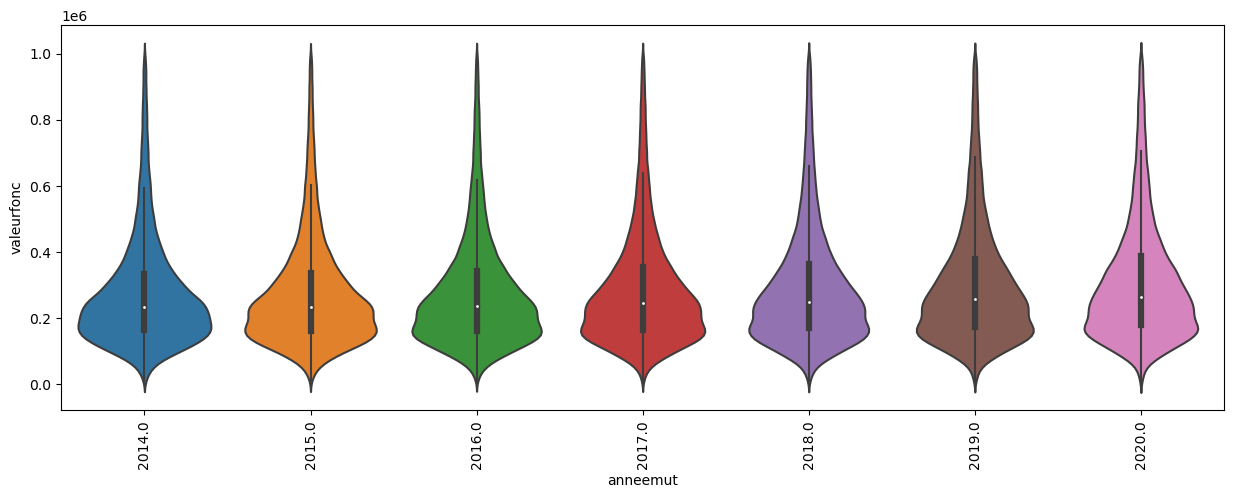

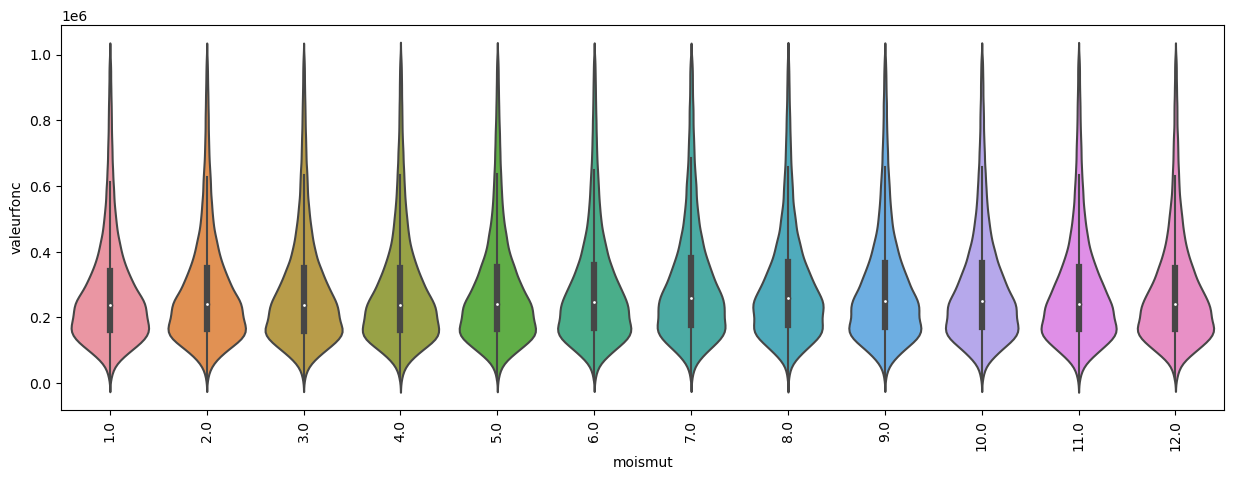

In [245]:
for cat in ['coddep','libnatmut','libtypbien','anneemut','moismut']:
    plt.figure(figsize=(15,5))
    sns.violinplot(data=df[df.valeurfonc<1e6],x=cat,y='valeurfonc')
    plt.xticks(rotation=90)
    plt.show()

#### HIGH RANGE : 

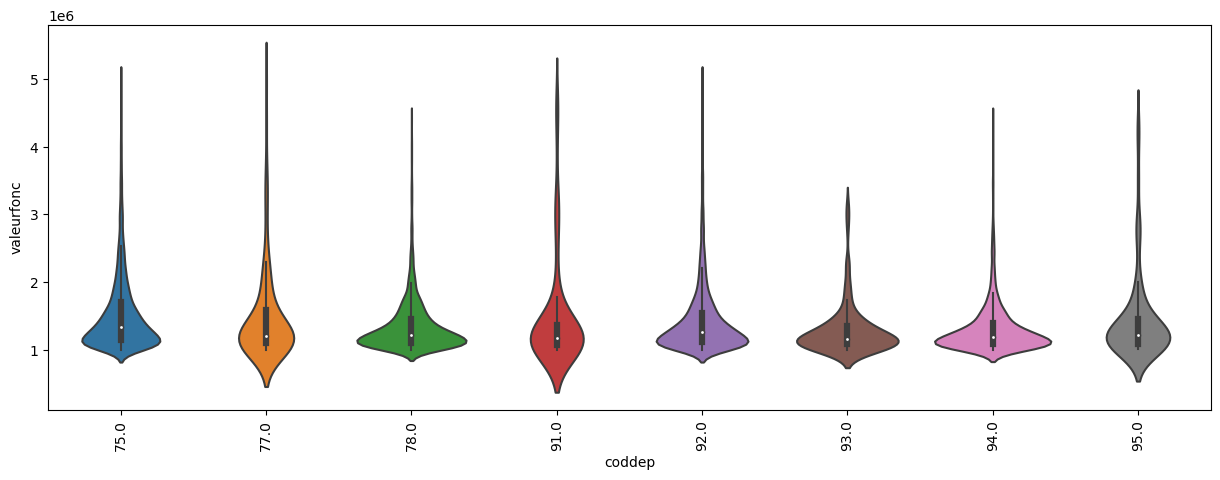

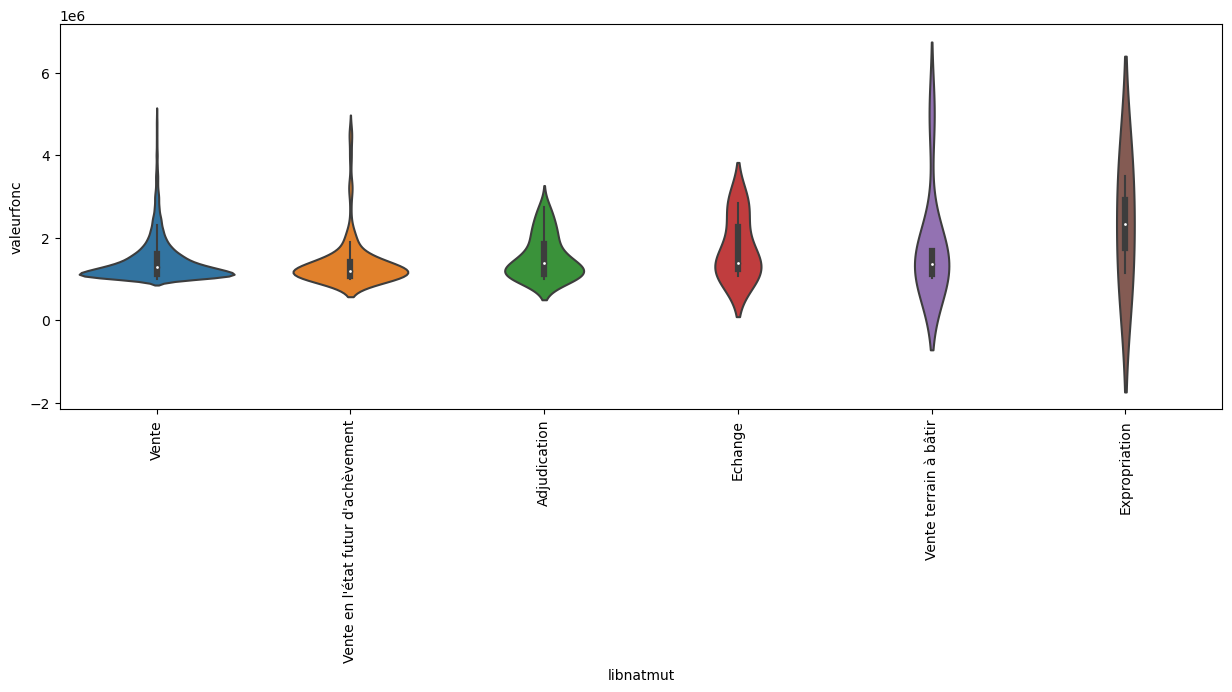

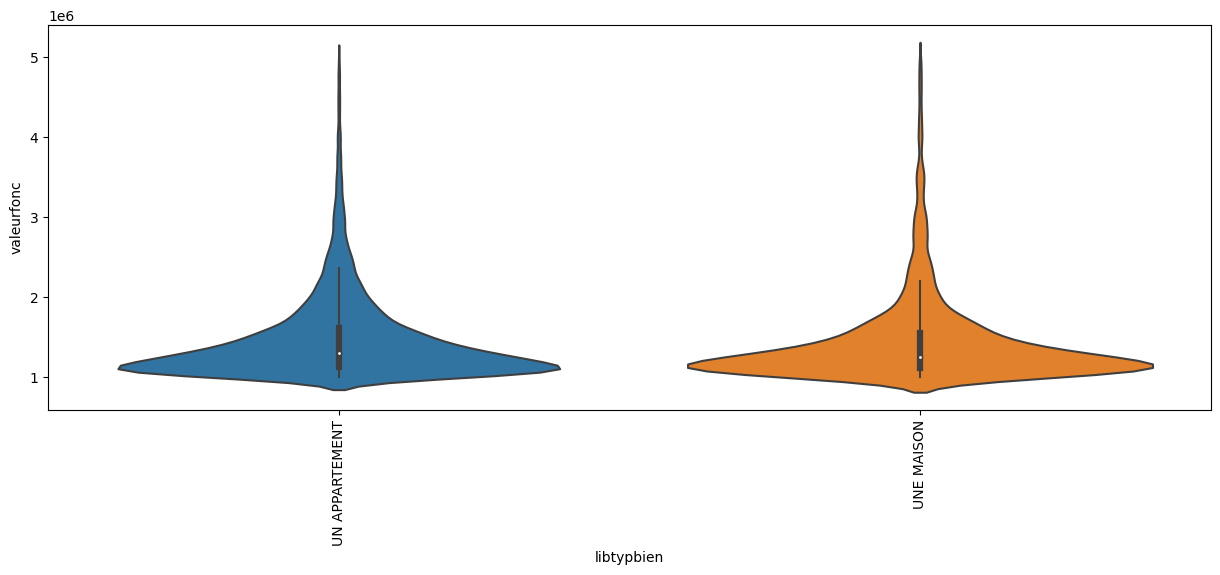

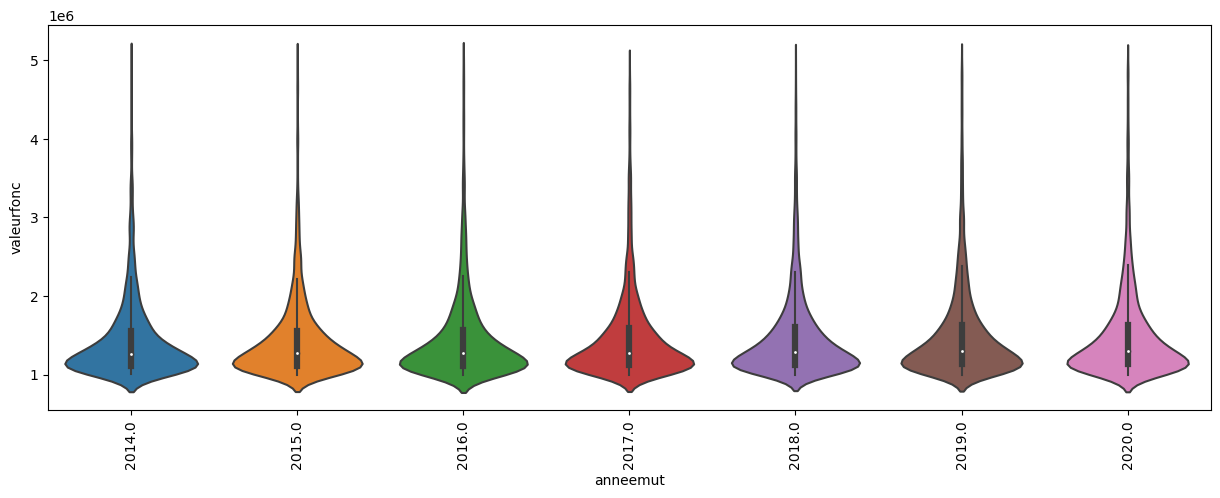

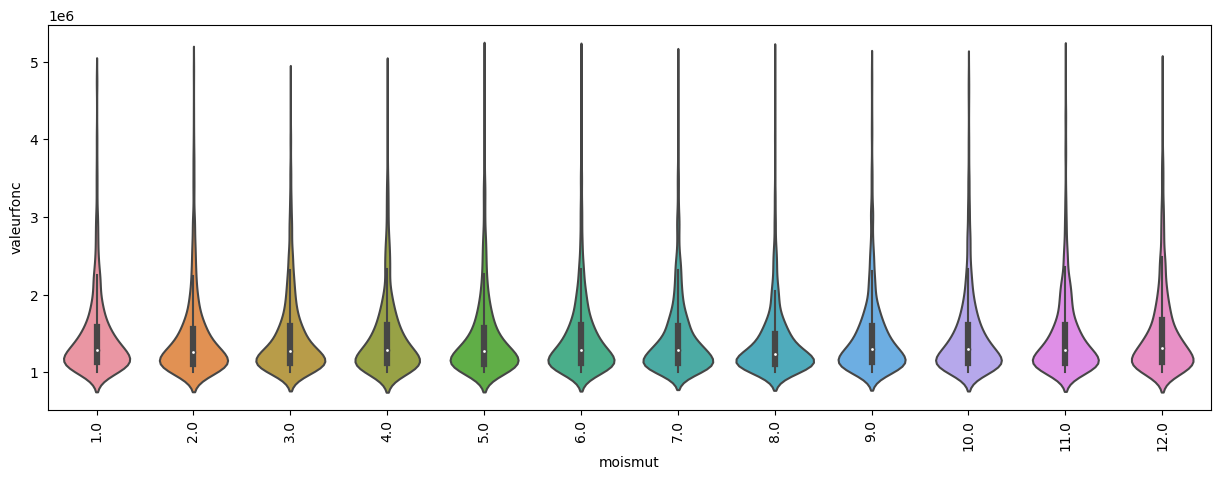

In [246]:
for cat in ['coddep','libnatmut','libtypbien','anneemut','moismut']:
    plt.figure(figsize=(15,5))
    sns.violinplot(data=df[df.valeurfonc>1e6],x=cat,y='valeurfonc')
    plt.xticks(rotation=90)
    plt.show()

### NUMERICAL FEATURES : 

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

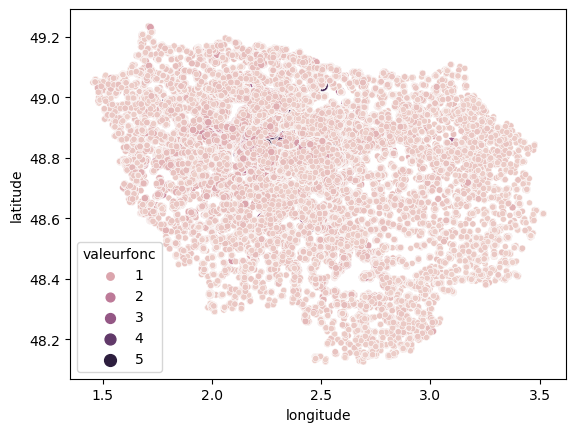

In [248]:
sns.scatterplot(data=df,x='longitude',y='latitude',size='valeurfonc',hue='valeurfonc',alpha=1)

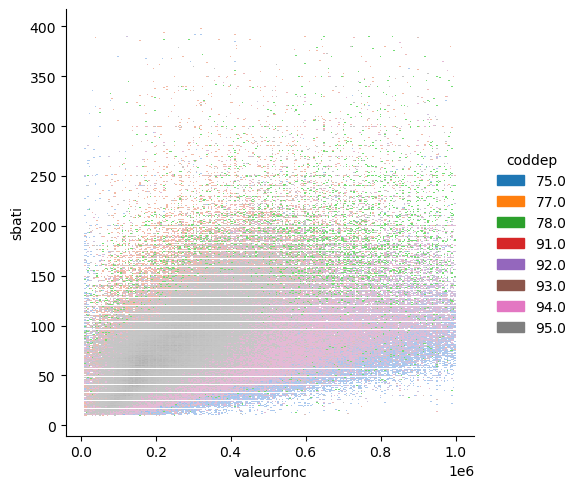

In [264]:
sns.displot(data=df[(df.valeurfonc<1e6)& (df.sbati<400)],x='valeurfonc',y='sbati',hue='coddep')

Really cool ! For same **valeurfonc**, you can have ranking of surface by departments, 75 the most expensive

KeyboardInterrupt: 

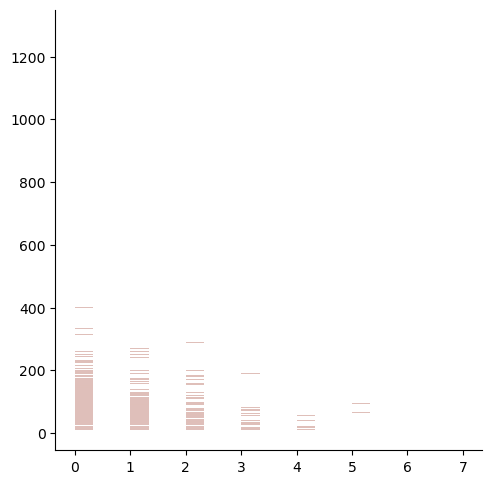

In [9]:
sns.displot(data=df,x='public_transport_spots',y='valeurfonc',hue='coddep')
plt.show()

# MODEL :

In [70]:
from sklearn.pipeline import Pipeline 
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.linear_model import LinearRegression,Lasso,ElasticNet
from lightgbm import LGBMRegressor
from sklearn.model_selection import KFold,cross_val_score,cross_validate
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint 
import mlflow
import mlflow.sklearn
from category_encoders import TargetEncoder
from sklearn.tree import DecisionTreeRegressor


cv = 5
params_grid = {'max_depth': 9, 'min_child_samples': 95, 'n_estimators': 100,
             'reg_alpha': 1.1193720724593983, 'reg_lambda': 0.6852571096124425}

model = LGBMRegressor(n_estimators=1000)

numerical_features =['sbati','latitude','longitude','anneemut','public_transport_spots']
categorical_features = ['coddep','libnatmut','libtypbien']
passthrough = ['nbapt1pp', 'nbapt2pp', 'nbapt3pp', 'nbapt4pp', 'nbapt5pp', 'nbmai1pp', 'nbmai2pp', 'nbmai3pp', 'nbmai4pp', 'nbmai5pp']

considered_cols = numerical_features+categorical_features+passthrough

categorical_transformer = OneHotEncoder(handle_unknown='ignore')
numerical_transformer = MinMaxScaler()

preprocessor  = ColumnTransformer([
    ('cat',categorical_transformer,categorical_features),
    ('num',numerical_transformer,numerical_features),
    ],remainder="passthrough")


def make_pipeline(model) : 
    pipe = Pipeline([
        ('preprocessor',preprocessor),
        ('regressor',model),
    ])
    return pipe

y = df['valeurfonc']
X = df[considered_cols]
train_x, test_x, train_y, test_y = train_test_split(X,y,test_size=0.2,random_state=42)

kf = KFold(n_splits=cv, shuffle=True)
    
def rmse(estimator,X_test,y_test): 
    y_pred=estimator.predict(X_test)
    return -mean_squared_error(y_test,y_pred,squared=False)

pipe = make_pipeline(model)
pipe.fit(train_x,train_y)
y_pred = pipe.predict(test_x)

# print("RMSE:", mean_squared_error(y_pred,test_y,squared=False))
# print("R2:", r2_score(test_y,y_pred))

scores  = cross_val_score(pipe,X,y,cv=kf,verbose=3)
scores  = cross_val_score(pipe,X,y,cv=kf,scoring='neg_root_mean_squared_error')
print(scores)

# with mlflow.start_run(run_name=f"{model.__class__.__name__}"):
#     rs = make_pipeline(model)
#     rs.fit(train_x,train_y)
#     y_pred = rs.predict(test_x)
#     mlflow.lightgbm.log_model(rs, "model")
#     y_pred = rs.predict(test_x)
#     mlflow.log_metric("train_score_r2",r2_score(train_y,rs.predict(train_x)))
#     mlflow.log_metric("train_score_rmse",mean_squared_error(train_y,rs.predict(train_x),squared=False))
#     mlflow.log_metric("test_score_r2", r2_score(test_y,y_pred))
#     mlflow.log_metric("test_score_rmse", mean_squared_error(test_y,y_pred,squared=False))
#     mlflow.log_params(rs.named_steps['regressor'].get_params())
#     mlflow.sklearn.log_model(rs.named_steps['regressor'], "model")
#     mlflow.set_tag('outliers','removing_over_5e6')
#     mlflow.set_tag('y_transformation','no_transformation')
#     mlflow.set_tag('data_aug','public_transport_spots')
#     plt.scatter(test_y,y_pred)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ................................ score: (test=0.817) total time=  12.1s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   12.1s remaining:    0.0s


[CV] END ................................ score: (test=0.816) total time=  12.1s


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   24.2s remaining:    0.0s


[CV] END ................................ score: (test=0.820) total time=  13.1s
[CV] END ................................ score: (test=0.812) total time=  13.0s
[CV] END ................................ score: (test=0.816) total time=  12.7s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  1.1min finished


[-113429.34225241 -115689.53212993 -113078.15268867 -113967.91568563
 -117848.91185372]


In [56]:
from sklearn.pipeline import Pipeline 
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.linear_model import LinearRegression,Lasso,ElasticNet
from lightgbm import LGBMRegressor
from sklearn.model_selection import KFold,cross_val_score,cross_validate
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint 
import mlflow
import mlflow.sklearn
from category_encoders import TargetEncoder
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
# Define a custom target encoding transformer
class TargetEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, target_mean):
        self.target_mean = target_mean

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        X_encoded = X.copy()
        X_encoded['nomcom_encoded'] = X_encoded['nomcom'].map(self.target_mean)
        X_encoded['nomcom_encoded'].fillna(np.mean(self.target_mean),inplace=True)
        return X_encoded[['nomcom_encoded']]


numerical_features =['sbati','latitude','longitude','anneemut','public_transport_spots']
categorical_features = ['coddep','libnatmut','libtypbien']
passthrough = ['nbapt1pp', 'nbapt2pp', 'nbapt3pp', 'nbapt4pp', 'nbapt5pp', 'nbmai1pp', 'nbmai2pp', 'nbmai3pp', 'nbmai4pp', 'nbmai5pp']
considered_cols = numerical_features+categorical_features+passthrough

CV = 1


RMSE = []
R2 = []

params_grid = {'max_depth': 9, 'min_child_samples': 95, 'n_estimators': 100,
            'reg_alpha': 1.1193720724593983, 'reg_lambda': 0.6852571096124425}
model = LGBMRegressor(n_estimators=1000)
#model = XGBRegressor(n_estimators=100)
for i in range(CV): 

    train, test = train_test_split(df,test_size=0.2)
    train['valeurfonc/sbati']=train['valeurfonc']/train['sbati']

    # Compute the target mean for each neighborhood only in the training set
    target_mean = train.groupby('nomcom')['valeurfonc/sbati'].mean()


    train_x, train_y = train[considered_cols+['nomcom']], train['valeurfonc']
    test_x, test_y = test[considered_cols+['nomcom']], test['valeurfonc']

    categorical_transformer = OneHotEncoder(handle_unknown='ignore')
    numerical_transformer = StandardScaler()

    preprocessor  = ColumnTransformer([    
        ('target_encoding',TargetEncoder(target_mean=target_mean),['nomcom']),
        ('cat',categorical_transformer,categorical_features),
        ('num',numerical_transformer,numerical_features),
        ],remainder="passthrough")


    def make_pipeline(model) : 
        pipe = Pipeline([
            ('preprocessor',preprocessor),
            ('regressor',model),
        ])
        return pipe

    pipe = make_pipeline(model)
    pipe.fit(train_x,train_y)
    y_pred = pipe.predict(test_x)
    rms = mean_squared_error(y_pred,test_y,squared=False)
    r2 = r2_score(test_y,y_pred)
    print(f"RMSE {i}:", rms)
    print(f"R2 {i}:", r2)
    RMSE += [rms]
    R2 += [r2]

print("mean RMSE:", np.mean(RMSE))
print("mean R2:", np.mean(R2))
# with mlflow.start_run(run_name=f"{model.__class__.__name__}"):
#     mlflow.log_metric("test_score_rmse", np.mean(RMSE))
#     mlflow.log_metric("test_score_r2", np.mean(R2))
#     mlflow.log_params(pipe.named_steps['regressor'].get_params())
#     mlflow.sklearn.log_model(pipe.named_steps['regressor'], "model")
#     mlflow.set_tag('outliers','removing_over_5e6')
#     mlflow.set_tag('y_transformation','no_transformation')
#     mlflow.set_tag('data_aug','public_transport_spots+nomcom')


high_values_idx = test_y > 1e6
low_values_idx = test_y <= 1e6

high_values_x = test_x[high_values_idx]
low_values_x = test_x[low_values_idx]

high_values_y_true = test_y[high_values_idx]
low_values_y_true = test_y[low_values_idx]

high_values_y_pred = pipe.predict(high_values_x)
low_values_y_pred = pipe.predict(low_values_x)

high_values_rmse = mean_squared_error(high_values_y_true, high_values_y_pred,squared=False)
print("RMSE for high values:", high_values_rmse)
low_values_rmse = mean_squared_error(low_values_y_true, low_values_y_pred,squared=False)
print("RMSE for low values:", low_values_rmse)
high_values_r2 = r2_score(high_values_y_true, high_values_y_pred)
print("R^2 for high values:", high_values_r2)
low_values_r2 = r2_score(low_values_y_true, low_values_y_pred)
print("R^2 for low values:", low_values_r2)


RMSE 0: 95568.540787576
R2 0: 0.8071595726138177
mean RMSE: 95568.540787576
mean R2: 0.8071595726138177
RMSE for high values: 504504.1074139755
RMSE for low values: 74134.05345582873
R^2 for high values: -0.00047720563575737174
R^2 for low values: 0.7850730350542169


In [55]:
#### LINEAR WITH SQRT 

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline 
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.linear_model import LinearRegression,Lasso,ElasticNet,Ridge
from lightgbm import LGBMRegressor
from sklearn.model_selection import KFold,cross_val_score,cross_validate
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint 
import mlflow
import mlflow.sklearn
from category_encoders import TargetEncoder
from sklearn.tree import DecisionTreeRegressor 


# Define a custom target encoding transformer
class TargetEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, target_mean):
        self.target_mean = target_mean

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        X_encoded = X.copy()
        X_encoded['nomcom_encoded'] = X_encoded['nomcom'].map(self.target_mean)
        X_encoded['nomcom_encoded'].fillna(np.mean(self.target_mean),inplace=True)
        return X_encoded[['nomcom_encoded']]


numerical_features =['sbati','latitude','longitude','anneemut','public_transport_spots']
categorical_features = ['coddep','libnatmut','libtypbien']
passthrough = ['nbapt1pp', 'nbapt2pp', 'nbapt3pp', 'nbapt4pp', 'nbapt5pp', 'nbmai1pp', 'nbmai2pp', 'nbmai3pp', 'nbmai4pp', 'nbmai5pp']
considered_cols = numerical_features+categorical_features+passthrough

CV = 1


RMSE = []
R2 = []

params_grid = {'max_depth': 9, 'min_child_samples': 95, 'n_estimators': 100,
            'reg_alpha': 1.1193720724593983, 'reg_lambda': 0.6852571096124425}
# model = LGBMRegressor(n_estimators=1000)
model = LinearRegression()
for i in range(CV): 

    train, test = train_test_split(df,test_size=0.2)
    train['valeurfonc/sbati']=train['valeurfonc']/train['sbati']

    # Compute the target mean for each neighborhood only in the training set
    target_mean = train.groupby('nomcom')['valeurfonc/sbati'].mean()


    train_x, train_y = train[considered_cols+['nomcom']], train['valeurfonc']
    test_x, test_y = test[considered_cols+['nomcom']], test['valeurfonc']

    categorical_transformer = OneHotEncoder(handle_unknown='ignore')
    numerical_transformer = StandardScaler()

    preprocessor  = ColumnTransformer([    
        ('target_encoding',TargetEncoder(target_mean=target_mean),['nomcom']),
        ('cat',categorical_transformer,categorical_features),
        ('num',numerical_transformer,numerical_features),
        ],remainder="passthrough")


    def make_pipeline(model) : 
        pipe = Pipeline([
            ('preprocessor',preprocessor),
            ('regressor',model),
        ])
        return pipe

    pipe = make_pipeline(model)
    pipe.fit(train_x,np.sqrt(train_y))
    y_pred = pipe.predict(test_x)**2
    rms = mean_squared_error(y_pred,test_y,squared=False)
    r2 = r2_score(test_y,y_pred)
    print(f"RMSE {i}:", rms)
    print(f"R2 {i}:", r2)
    RMSE += [rms]
    R2 += [r2]

print("mean RMSE:", np.mean(RMSE))
print("mean R2:", np.mean(R2))
# with mlflow.start_run(run_name=f"{model.__class__.__name__}"):
#     mlflow.log_metric("test_score_r2", np.mean(R2))
#     mlflow.log_metric("test_score_rmse", np.mean(RMSE))
#     mlflow.sklearn.log_model(pipe.named_steps['regressor'], "model")
#     mlflow.set_tag('outliers','removing_over_5e6')
#     mlflow.set_tag('y_transformation','sqrt')
#     mlflow.set_tag('data_aug','public_transport_spots+communes')

high_values_idx = test_y > 1e6
low_values_idx = test_y <= 1e6

high_values_x = test_x[high_values_idx]
low_values_x = test_x[low_values_idx]

high_values_y_true = test_y[high_values_idx]
low_values_y_true = test_y[low_values_idx]

high_values_y_pred = pipe.predict(high_values_x)**2
low_values_y_pred = pipe.predict(low_values_x)**2

high_values_rmse = mean_squared_error(high_values_y_true, high_values_y_pred,squared=False)
print("RMSE for high values:", high_values_rmse)
low_values_rmse = mean_squared_error(low_values_y_true, low_values_y_pred,squared=False)
print("RMSE for low values:", low_values_rmse)
high_values_r2 = r2_score(high_values_y_true, high_values_y_pred)
print("R^2 for high values:", high_values_r2)
low_values_r2 = r2_score(low_values_y_true, low_values_y_pred)
print("R^2 for low values:", low_values_r2)


RMSE 0: 125769.5907219269
R2 0: 0.6549926893108571
mean RMSE: 125769.5907219269
mean R2: 0.6549926893108571
RMSE for high values: 720315.7513960307
RMSE for low values: 92681.3977919106
R^2 for high values: -1.280304366032008
R^2 for low values: 0.6630955175273651


In [37]:
import shap


train_x, test_x, train_y, test_y = train_test_split(X,y,test_size=0.05)

# Preprocess the test data
preprocessed_test_x = preprocessor.transform(test_x)

# Create the explainer object using the training data
explainer = shap.Explainer(model, preprocessor.transform(train_x))

# Compute the Kapley values
shap_values = explainer(preprocessed_test_x)

# Plot the Kapley values
shap.plots.waterfall(shap_values)


100%|===================| 46390/46623 [02:06<00:00]        

Exception: waterfall_plot requires a scalar base_values of the model output as the first parameter, but you have passed an array as the first parameter! Try shap.waterfall_plot(explainer.base_values[0], values[0], X[0]) or for multi-output models try shap.waterfall_plot(explainer.base_values[0], values[0][0], X[0]).

### LASSO FEATURE SELECTION : 

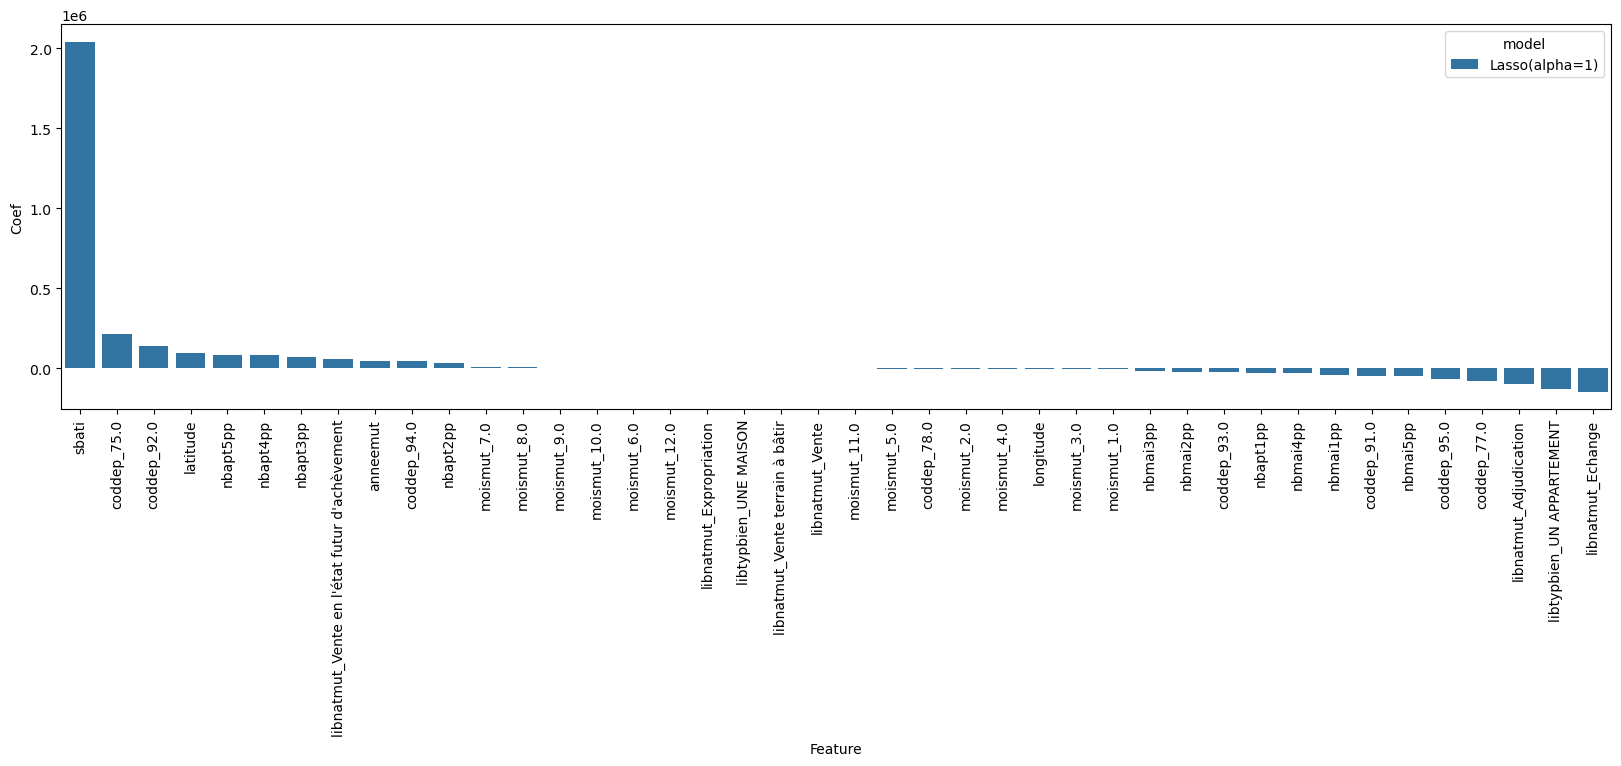

In [275]:

coefficients = pipe.named_steps['regressor'].coef_

# coefficients = list(map(abs,coefficients))
# coefficients = [x/sum(coefficients) for x in coefficients]
feature_names = list(pipe.named_steps['preprocessor'].transformers_[0][1].get_feature_names_out(input_features=categorical_features))
feature_names+=numerical_features+passthrough
coeff_df_lgbm = pd.DataFrame({'Feature':feature_names, 'Coef':coefficients,'model' : str(pipe.named_steps['regressor'])})

coeff_df_lgbm.sort_values('Coef',ascending=False,inplace=True)
plt.figure(figsize=(20,5))
sns.barplot(data=coeff_df_lgbm,x='Feature',y="Coef",hue='model')
plt.xticks(rotation=90)
plt.show()

### RandomForest feature_importances: 

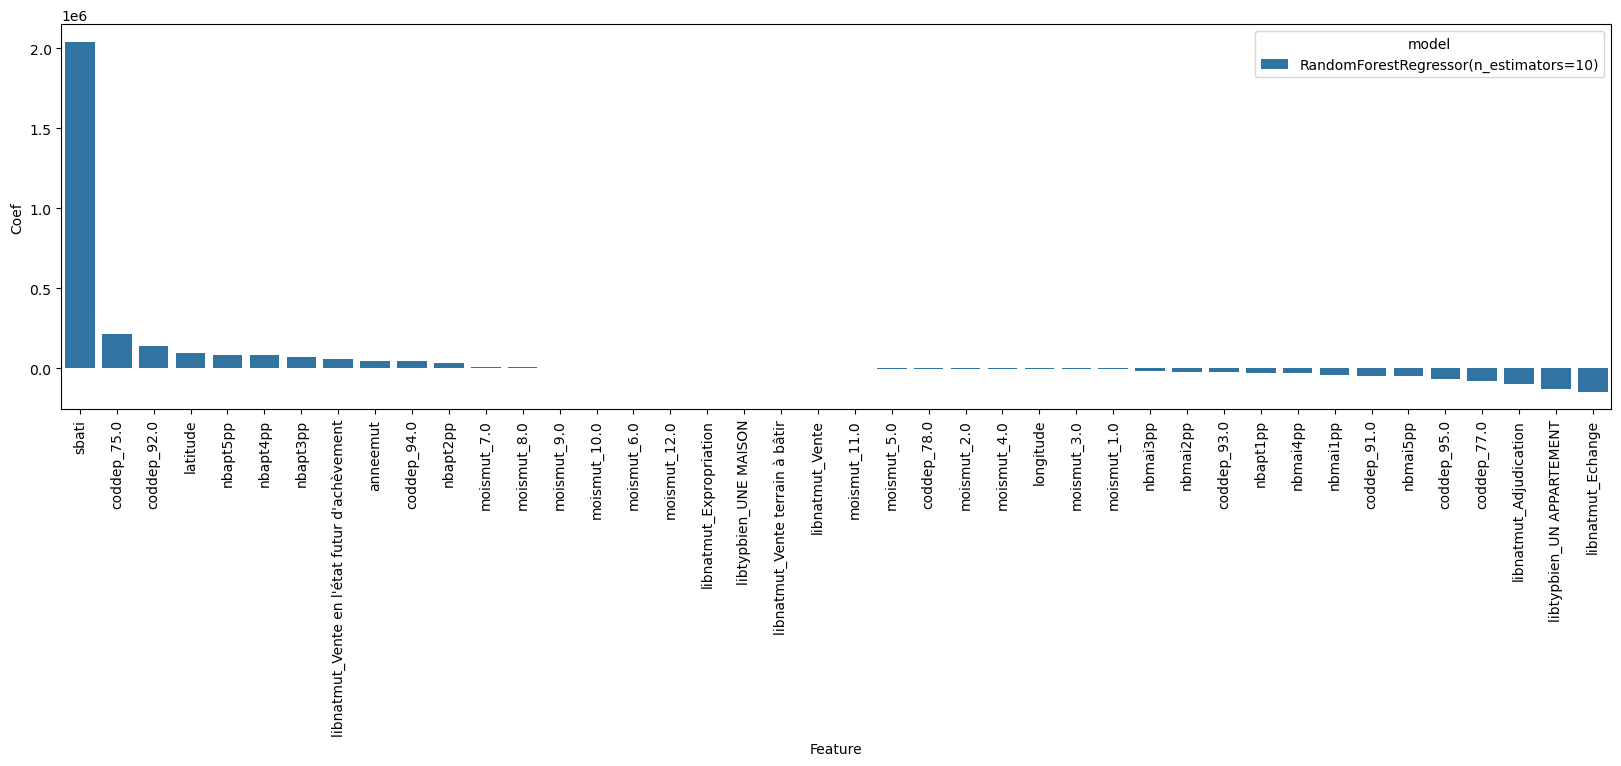

In [294]:
pipe.fit(X,y)
coef = pipe.named_steps['regressor'].feature_importances_

feature_names = list(pipe.named_steps['preprocessor'].transformers_[0][1].get_feature_names_out(input_features=categorical_features))
feature_names+=numerical_features+passthrough
coef = pd.DataFrame({'Feature':feature_names, 'Coef':coefficients,'model' : str(pipe.named_steps['regressor'])})

coef.sort_values('Coef',ascending=False,inplace=True)
plt.figure(figsize=(20,5))
sns.barplot(data=coef,x='Feature',y="Coef",hue='model')
plt.xticks(rotation=90)
plt.show()

#  HYPERTUNING :

Fitting 2 folds for each of 3 candidates, totalling 6 fits
[CV 1/2] END regressor__max_depth=5, regressor__min_child_samples=36, regressor__n_estimators=2759, regressor__reg_alpha=0.4128767601088123, regressor__reg_lambda=0.995533544771299;, score=0.808 total time=  28.3s
[CV 2/2] END regressor__max_depth=5, regressor__min_child_samples=36, regressor__n_estimators=2759, regressor__reg_alpha=0.4128767601088123, regressor__reg_lambda=0.995533544771299;, score=0.805 total time=  27.2s
[CV 1/2] END regressor__max_depth=6, regressor__min_child_samples=99, regressor__n_estimators=2061, regressor__reg_alpha=0.6846530783930058, regressor__reg_lambda=0.4705550014231567;, score=0.810 total time=  28.5s
[CV 2/2] END regressor__max_depth=6, regressor__min_child_samples=99, regressor__n_estimators=2061, regressor__reg_alpha=0.6846530783930058, regressor__reg_lambda=0.4705550014231567;, score=0.806 total time=  27.8s
[CV 1/2] END regressor__max_depth=5, regressor__min_child_samples=95, regressor__n_

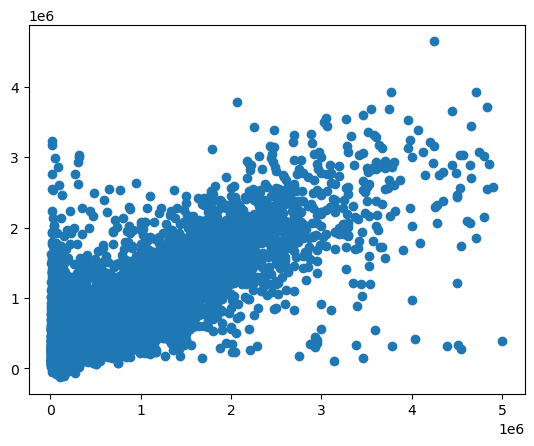

In [107]:
from sklearn.pipeline import Pipeline 
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.linear_model import LinearRegression,Lasso
from lightgbm import LGBMRegressor
from sklearn.model_selection import KFold,cross_val_score,cross_validate
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint,uniform
import mlflow
import mlflow.sklearn


models = [LGBMRegressor()]
param_grids = [ {'regressor__n_estimators': randint(1000,3000),
            'regressor__max_depth': randint(5,10),
            'regressor__reg_alpha' : uniform(0.3,1),
            'regressor__reg_lambda' : uniform(0.3,1),
            'regressor__min_child_samples': randint(20,100), 
            # 'regressor__subsample': uniform(0.5,1),
            # 'regressor__colsample_bytree': uniform(0.5,1)          
            }]
# models = [LinearRegression()]
# param_grids = [ {}]


# models = [RandomForestRegressor()]
# param_grids = [ {'regressor__n_estimators': randint(10,200),
#             'regressor__max_depth': [None, 5, 10, 20, 50],
#             'regressor__min_samples_split' : [2, 5, 10, 20],
#             'regressor__min_samples_leaf' : [1, 2, 5, 10],
#             'regressor__max_features': [None, 'auto', 'sqrt', 'log2']
#             }]

cv = 2




numerical_features =['sbati','latitude','longitude','anneemut','public_transport_spots']
categorical_features = ['coddep','libnatmut','libtypbien','moismut']
passthrough = ['nbapt1pp', 'nbapt2pp', 'nbapt3pp', 'nbapt4pp', 'nbapt5pp', 'nbmai1pp', 'nbmai2pp', 'nbmai3pp', 'nbmai4pp', 'nbmai5pp']

categorical_transformer = OneHotEncoder()
numerical_transformer = MinMaxScaler()


preprocessor  = ColumnTransformer([
    ('cat',categorical_transformer,categorical_features),
    ('num',numerical_transformer,numerical_features),
    ],remainder="passthrough")


def make_pipeline(model) : 
    pipe = Pipeline([
        ('preprocessor',preprocessor),
        ('regressor',model),
    ])
    return pipe

y = df['valeurfonc']
X = df.drop('valeurfonc',axis=1)
train_x, test_x, train_y, test_y = train_test_split(X, y,random_state=42)

# train,test = train_test_split(df2,random_state=42)
# test_x, test_y = test.drop('valeurfonc',axis=1), test['valeurfonc']
# train_x, train_y = train[train['valeurfonc']<=1e6].drop('valeurfonc',axis=1) , train[train['valeurfonc']<=1e6]['valeurfonc']

kf = KFold(n_splits=cv, shuffle=True, random_state=42)

def rmse_from_sqrt(estimator,X_test,y_test): 
    y_pred=estimator.predict(X_test)
    return -mean_squared_error(y_test**2,y_pred**2,squared=False)

def rmse_from_log(estimator,X_test,y_test): 
    y_pred = estimator.predict(X_test)
    return -mean_squared_error(np.exp(y_test),np.exp(y_pred),squared=False)
def rmse(estimator,X_test,y_test): 
    y_pred=estimator.predict(X_test)
    return -mean_squared_error(y_test,y_pred,squared=False)


for model, param_grid in zip(models, param_grids):


    with mlflow.start_run(run_name=f"{model.__class__.__name__}"):
        rs = RandomizedSearchCV(make_pipeline(model), param_distributions=param_grids,cv=kf,n_iter=3,verbose=3,scoring='r2')
        rs.fit(train_x, train_y)

        mlflow.lightgbm.log_model(rs, "model")
        y_pred = rs.predict(test_x)
        mlflow.log_metric("train_score_r2",r2_score(train_y,rs.predict(train_x)))
        mlflow.log_metric("train_score_rmse",mean_squared_error(train_y,rs.predict(train_x),squared=False))
        mlflow.log_metric("test_score_r2", r2_score(test_y,y_pred))
        mlflow.log_metric("test_score_rmse", mean_squared_error(test_y,y_pred,squared=False))
        mlflow.log_params(rs.best_params_)
        mlflow.sklearn.log_model(rs.best_estimator_, "model")
        mlflow.set_tag('outliers','removing_over_5e6')
        mlflow.set_tag('y_transformation','no_transformation')
        mlflow.set_tag('data_aug','public_transport_spots')

        plt.scatter(test_y,y_pred)
        
    print("Best parameters:", rs.best_params_)
    print("Best cross-validation score:", rs.best_score_)



### SPLITTING METRIC FOR <1M and >1M : 

In [104]:
high_values_idx = test_y > 1e6
low_values_idx = test_y <= 1e6

high_values_x = test_x[high_values_idx]
low_values_x = test_x[low_values_idx]

high_values_y_true = test_y[high_values_idx]
low_values_y_true = test_y[low_values_idx]

high_values_y_pred = rs.predict(high_values_x)
low_values_y_pred = rs.predict(low_values_x)

high_values_rmse = mean_squared_error(high_values_y_true, high_values_y_pred,squared=False)
print("RMSE for high values:", high_values_rmse)
low_values_rmse = mean_squared_error(low_values_y_true, low_values_y_pred,squared=False)
print("RMSE for low values:", low_values_rmse)
high_values_r2 = r2_score(high_values_y_true, high_values_y_pred)
print("R^2 for high values:", high_values_r2)
low_values_r2 = r2_score(low_values_y_true, low_values_y_pred)
print("R^2 for low values:", low_values_r2)

RMSE for high values: 460993.51059881074
RMSE for low values: 89330.86665127608
R^2 for high values: 0.3186512787400565
R^2 for low values: 0.7354797760611279


In [ ]:
########### USE TARGETED ENCODER

# XGB + LGBM Feature importance :

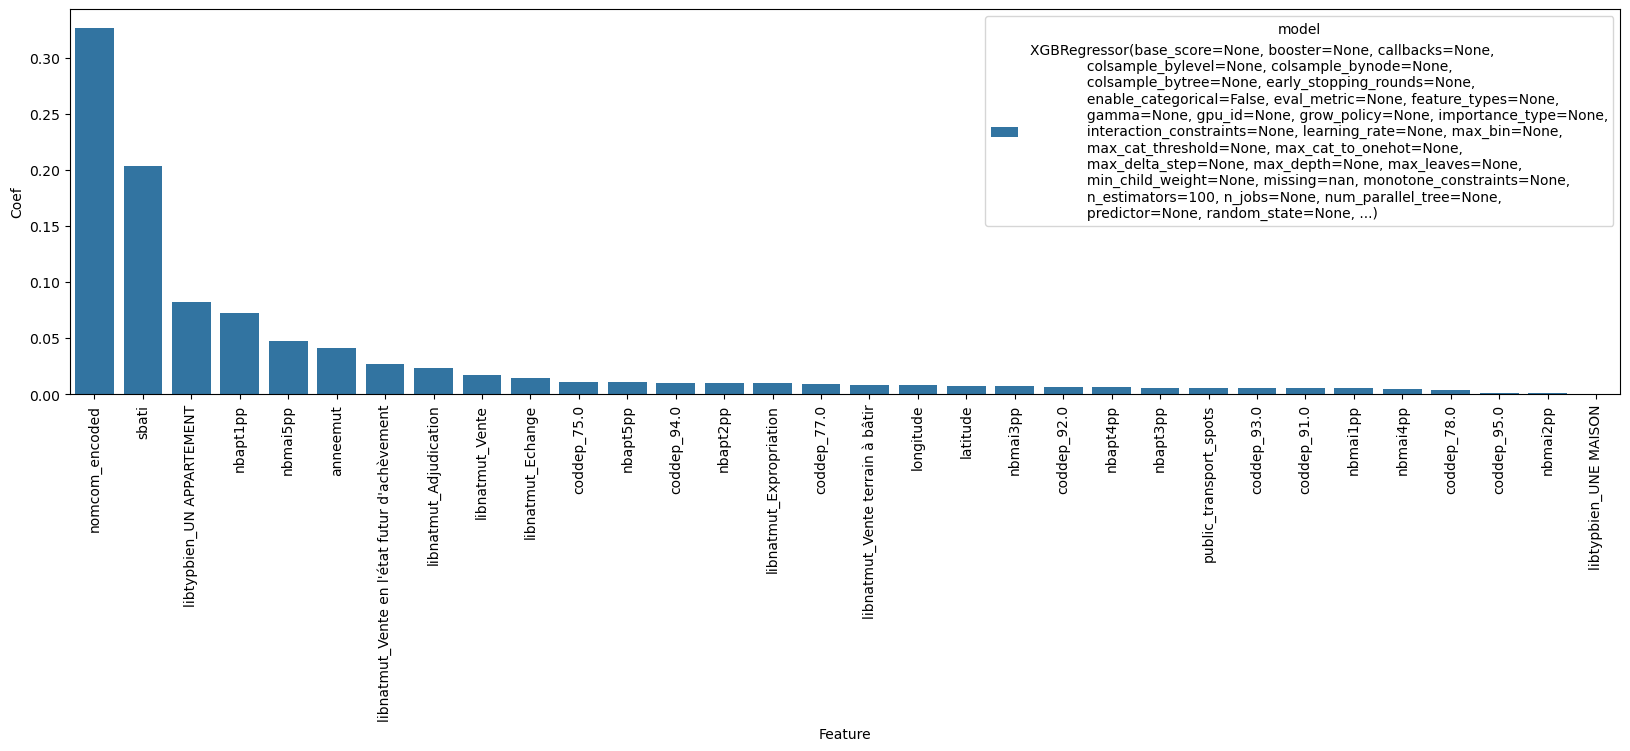

In [112]:
coef = pipe.named_steps['regressor'].feature_importances_
feature_names = ['nomcom_encoded']
feature_names += list(pipe.named_steps['preprocessor'].transformers_[1][1].get_feature_names_out(input_features=categorical_features))
feature_names+=numerical_features+passthrough
coef = pd.DataFrame({'Feature':feature_names, 'Coef':coef,'model' : str(pipe.named_steps['regressor'])})

coef.sort_values('Coef',ascending=False,inplace=True)
plt.figure(figsize=(20,5))
sns.barplot(data=coef,x='Feature',y="Coef",hue='model')
plt.xticks(rotation=90)
plt.show()

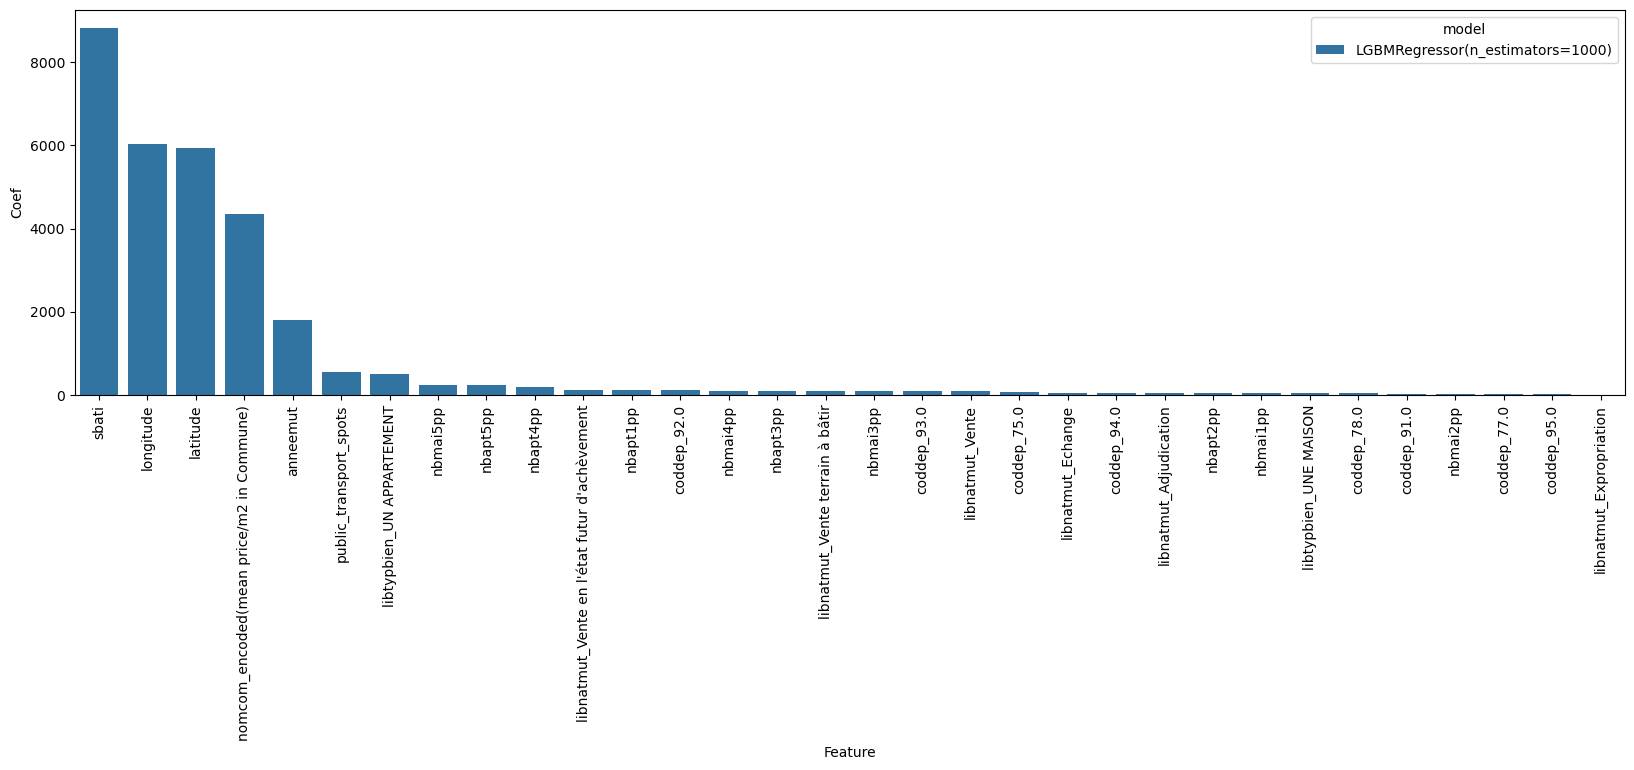

In [116]:
coef = pipe.named_steps['regressor'].feature_importances_
feature_names = ['nomcom_encoded(mean price/m2 in Commune)']
feature_names += list(pipe.named_steps['preprocessor'].transformers_[1][1].get_feature_names_out(input_features=categorical_features))
feature_names+=numerical_features+passthrough
coef = pd.DataFrame({'Feature':feature_names, 'Coef':coef,'model' : str(pipe.named_steps['regressor'])})

coef.sort_values('Coef',ascending=False,inplace=True)
plt.figure(figsize=(20,5))
sns.barplot(data=coef,x='Feature',y="Coef",hue='model')
plt.xticks(rotation=90)
plt.show()